<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/Decision_tree_fraud_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('/content/Fraud_check.csv')

In [3]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data.shape

(600, 6)

In [6]:
data.dropna(inplace=True)

In [7]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [8]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
data = pd.get_dummies(data, columns=['Undergrad','Urban'],drop_first=True)

In [10]:
data = pd.get_dummies(data,columns=['Marital.Status'])

In [11]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,68833,50047,10,0,1,0,0,1
1,33700,134075,18,1,1,1,0,0
2,36925,160205,30,0,1,0,1,0
3,50190,193264,15,1,1,0,0,1
4,81002,27533,28,0,0,0,1,0
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,1,1,0,0
596,69967,55369,2,1,1,1,0,0
597,47334,154058,0,0,1,1,0,0
598,98592,180083,17,1,0,0,1,0


In [12]:
data = data.rename({'Undergrad_YES':'Undergrad','Urban_YES':'Urban','Taxable.Income':'Taxable_income'},axis=1)

In [13]:
data

,Taxable_income,City.Population,Work.Experience,Undergrad,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,68833,50047,10,0,1,0,0,1
1,33700,134075,18,1,1,1,0,0
2,36925,160205,30,0,1,0,1,0
3,50190,193264,15,1,1,0,0,1
4,81002,27533,28,0,0,0,1,0
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,1,1,0,0
596,69967,55369,2,1,1,1,0,0
597,47334,154058,0,0,1,1,0,0
598,98592,180083,17,1,0,0,1,0


In [14]:
data.describe()

,Taxable_income,City.Population,Work.Experience,Undergrad,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333,0.520000,0.503333,0.315000,0.323333,0.361667
std,26204.827597,49850.075134,8.842147,0.500017,0.500406,0.464903,0.468139,0.480884
min,10003.000000,25779.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32871.500000,66966.750000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55074.500000,106493.500000,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,78611.750000,150114.250000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,99619.000000,199778.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
data['Taxable_income'] = pd.cut(data['Taxable_income'],bins=(10000,30000,99620),labels=('Risky','Good'))


In [16]:
data

,Taxable_income,City.Population,Work.Experience,Undergrad,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,Good,50047,10,0,1,0,0,1
1,Good,134075,18,1,1,1,0,0
2,Good,160205,30,0,1,0,1,0
3,Good,193264,15,1,1,0,0,1
4,Good,27533,28,0,0,0,1,0
...,...,...,...,...,...,...,...,...
595,Good,39492,7,1,1,1,0,0
596,Good,55369,2,1,1,1,0,0
597,Good,154058,0,0,1,1,0,0
598,Good,180083,17,1,0,0,1,0


In [17]:
data['Taxable_income'].value_counts()

Good     476
Risky    124
Name: Taxable_income, dtype: int64

In [18]:
data = pd.get_dummies(data, columns=['Taxable_income'],drop_first=True)

In [19]:
data

,City.Population,Work.Experience,Undergrad,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Taxable_income_Good
0,50047,10,0,1,0,0,1,1
1,134075,18,1,1,1,0,0,1
2,160205,30,0,1,0,1,0,1
3,193264,15,1,1,0,0,1,1
4,27533,28,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
595,39492,7,1,1,1,0,0,1
596,55369,2,1,1,1,0,0,1
597,154058,0,0,1,1,0,0,1
598,180083,17,1,0,0,1,0,1


In [20]:
data = data.rename({'Taxable_income_Good':'Taxable_income'},axis=1)

In [21]:
data

,City.Population,Work.Experience,Undergrad,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Taxable_income
0,50047,10,0,1,0,0,1,1
1,134075,18,1,1,1,0,0,1
2,160205,30,0,1,0,1,0,1
3,193264,15,1,1,0,0,1,1
4,27533,28,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
595,39492,7,1,1,1,0,0,1
596,55369,2,1,1,1,0,0,1
597,154058,0,0,1,1,0,0,1
598,180083,17,1,0,0,1,0,1


In [22]:
data['Taxable_income'].value_counts()

1    476
0    124
Name: Taxable_income, dtype: int64

In [23]:
data[data.duplicated()]

,City.Population,Work.Experience,Undergrad,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Taxable_income


In [24]:
data.drop_duplicates()

,City.Population,Work.Experience,Undergrad,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Taxable_income
0,50047,10,0,1,0,0,1,1
1,134075,18,1,1,1,0,0,1
2,160205,30,0,1,0,1,0,1
3,193264,15,1,1,0,0,1,1
4,27533,28,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
595,39492,7,1,1,1,0,0,1
596,55369,2,1,1,1,0,0,1
597,154058,0,0,1,1,0,0,1
598,180083,17,1,0,0,1,0,1


In [25]:
df = pd.read_csv('/content/Fraud_check.csv')

In [26]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


Data splitting and hyperparameter tuning

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
data

,City.Population,Work.Experience,Undergrad,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Taxable_income
0,50047,10,0,1,0,0,1,1
1,134075,18,1,1,1,0,0,1
2,160205,30,0,1,0,1,0,1
3,193264,15,1,1,0,0,1,1
4,27533,28,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
595,39492,7,1,1,1,0,0,1
596,55369,2,1,1,1,0,0,1
597,154058,0,0,1,1,0,0,1
598,180083,17,1,0,0,1,0,1


In [29]:
x = data.drop('Taxable_income',axis=1)
y = data['Taxable_income']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=30)

In [31]:
y_train

429    1
256    1
491    0
317    1
138    1
      ..
260    1
126    0
573    1
128    1
203    1
Name: Taxable_income, Length: 420, dtype: uint8

In [32]:
y_train.value_counts(normalize=True)

1    0.792857
0    0.207143
Name: Taxable_income, dtype: float64

In [33]:
y_test.value_counts(normalize=True)

1    0.794444
0    0.205556
Name: Taxable_income, dtype: float64

Hyperparameter tuning

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
model = DecisionTreeClassifier(criterion='gini')
params = {'max_depth':range(1,10),'max_leaf_nodes':range(2,31),'min_samples_leaf':range(1,10)}
grid = GridSearchCV(model, param_grid=params, scoring='accuracy',cv=6,return_train_score=True)
grid.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 31),
                         'min_samples_leaf': range(1, 10)},
             return_train_score=True, scoring='accuracy')

In [36]:
grid.best_params_

{'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 1}

In [37]:
model_ent = DecisionTreeClassifier(criterion='entropy')
params_ent = {'max_depth':range(1,8),'max_leaf_nodes':range(1,30),'min_samples_leaf':range(1,10)}
grid_ent = GridSearchCV(model_ent, param_grid=params_ent, scoring='accuracy',cv=6,return_train_score=True)
grid_ent.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
378 fits failed out of a total of 10962.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
378 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 316, in fit
    max_leaf_nodes
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.war

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': range(1, 8),
                         'max_leaf_nodes': range(1, 30),
                         'min_samples_leaf': range(1, 10)},
             return_train_score=True, scoring='accuracy')

In [38]:
grid_ent.best_params_

{'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 1}

Model building using both the criterion and optimum pruning parameters.

In [39]:
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=1,max_leaf_nodes=2,min_samples_leaf=1)

In [40]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)

In [41]:
y_pred_gin = model_gini.predict(x_test)

In [42]:
np.mean(y_pred_gin==y_test)

0.7944444444444444

In [62]:
model_ent = DecisionTreeClassifier(criterion='entropy',max_depth=1, max_leaf_nodes=2, min_samples_leaf=1)

In [63]:
model_ent.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, max_leaf_nodes=2)

In [64]:
y_pred_ent = model_ent.predict(x_test)

In [65]:
np.mean(y_pred_ent==y_test)

0.7944444444444444

In [66]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'City.Population <= 40128.5\ngini = 0.328\nsamples = 420\nvalue = [87, 333]\nclass = 1'),
 Text(0.25, 0.25, 'gini = 0.424\nsamples = 36\nvalue = [11, 25]\nclass = 1'),
 Text(0.75, 0.25, 'gini = 0.317\nsamples = 384\nvalue = [76, 308]\nclass = 1')]

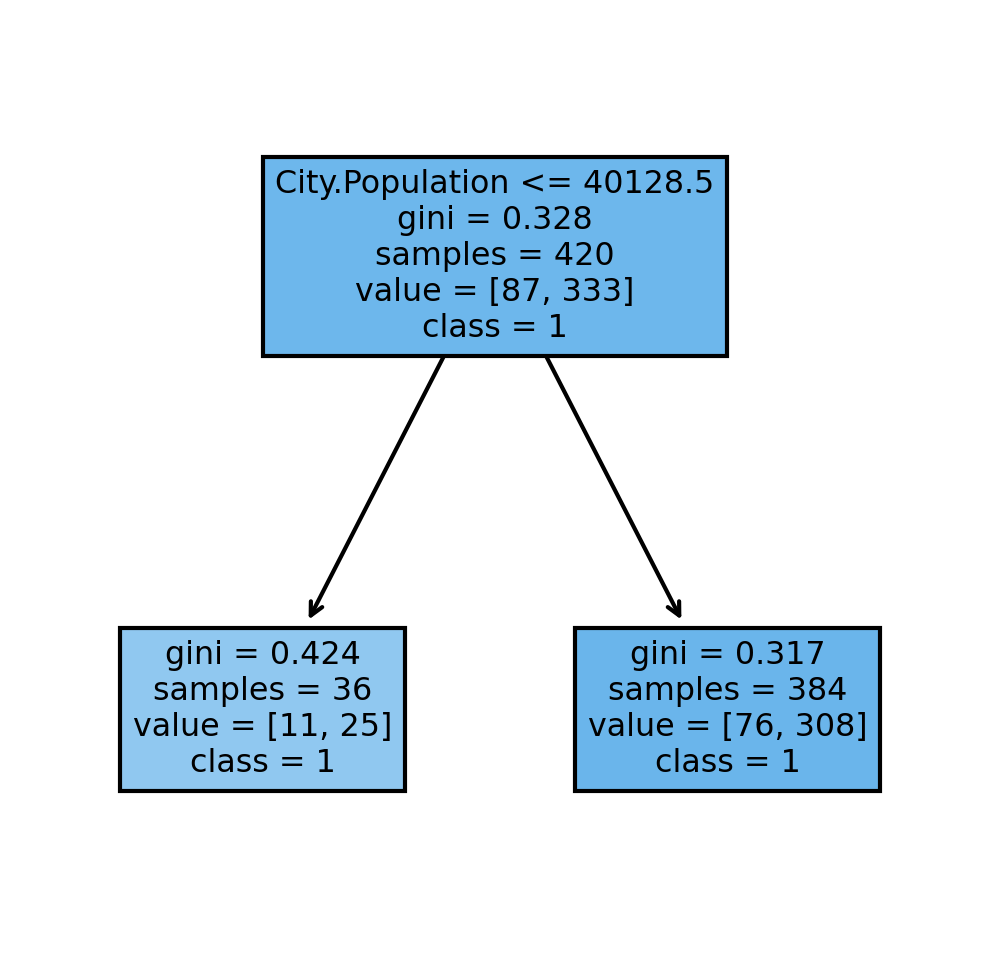

In [67]:
fn = ['City.Population',	'Work.Experience',	'Undergrad',	'Urban',	'Marital.Status_Divorced',	'Marital.Status_Married',	'Marital.Status_Single']
cn = ['0','1']
fig,axes = plt.subplots(ncols=1,nrows=1,figsize=(4,4),dpi=300)
plot_tree(model_gini,feature_names=fn,class_names=cn,filled=True)

In [68]:
model_check = DecisionTreeClassifier(criterion='entropy',max_depth=3, max_leaf_nodes=5, min_samples_leaf=3)

In [69]:
model_check.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=5,
                       min_samples_leaf=3)

In [70]:
y_pred_check = model_check.predict(x_test)

In [71]:
np.mean(y_pred_check==y_test)

0.7722222222222223

**Both the entropy and gini criteria are showing the same accuracy of 79.4444%**

In [73]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


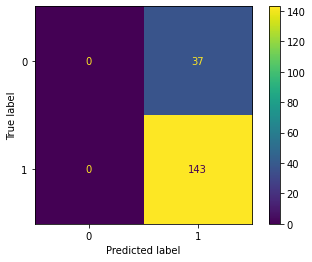

In [74]:
cm = plot_confusion_matrix(model_gini,x_test,y_test)

In [75]:
confusion_matrix(y_pred_gin,y_test)

array([[  0,   0],
       [ 37, 143]])

In [77]:
print(classification_report(y_pred_gin,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.79      0.89       180

    accuracy                           0.79       180
   macro avg       0.50      0.40      0.44       180
weighted avg       1.00      0.79      0.89       180



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
y_prob_gin = model_gini.predict_proba(x_test)[:,1]
y_prob_ent = model_ent.predict_proba(x_test)[:,1]
y_prob_check = model_check.predict_proba(x_test)[:,1]

In [79]:
from sklearn.metrics import roc_auc_score,roc_curve

In [92]:
fpr,tpr,thresholds = roc_curve(y_test, y_prob_gin)
fpr1,tpr1,thresholds1 = roc_curve(y_test,y_prob_ent)
fpr2,tpr2,thresholds2 = roc_curve(y_test, y_prob_check)

In [94]:
model_check1 = DecisionTreeClassifier(criterion='entropy',max_depth=3, max_leaf_nodes=10)

In [95]:
model_check1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=10)

In [97]:
y_pred_c1 = model_check1.predict(x_test)

In [98]:
y_probc1 = model_check1.predict_proba(x_test)[:,1]

In [99]:
np.mean(y_test==y_pred_c1)

0.7722222222222223

In [100]:
fpr3,tpr3,thresholds3 = roc_curve(y_test, y_probc1)

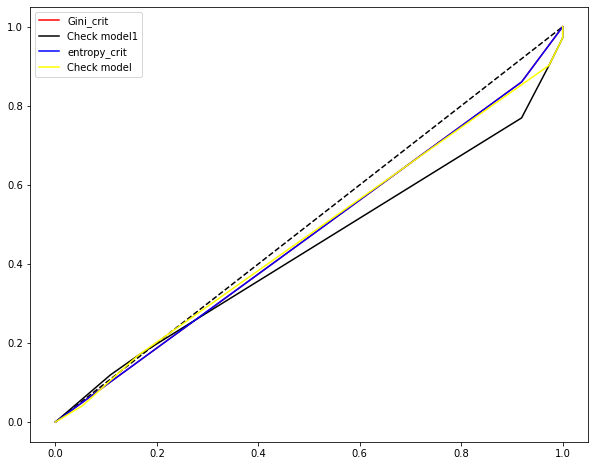

In [102]:
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gini_crit',color='red')
plt.plot(fpr3,tpr3,label='Check model1',color='black')
plt.plot(fpr1,tpr1,label='entropy_crit',color='blue')
plt.plot(fpr2,tpr2,label='Check model',color='yellow')
plt.legend(loc='best')
plt.show()

In [104]:
s1 = roc_auc_score(y_test,y_prob_ent)
s2 = roc_auc_score(y_test,y_prob_gin)

In [105]:
print(s1,'\n',s2)

0.47061047061047057 
 0.47061047061047057


**The accuracy of the best model is 79.44% and the AUC_SCORE is 47.06%. The reason why AUC_SCORE is way less compared to the model accuracy is that the AUC_SCORE takes into account of probabilities without considering any single threshold and the average is taken across all the possible thresholds**

In [106]:
from sklearn.model_selection import cross_val_score

In [107]:
cross_score = cross_val_score(model_ent,x_train,y_train,cv=5,scoring='accuracy')

In [108]:
cross_score

array([0.79761905, 0.79761905, 0.79761905, 0.78571429, 0.78571429])

In [110]:
cross_score.mean()*100

79.28571428571429